In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [312]:
data = pd.read_csv('data.csv')
data['distance'] = data['distance'] = np.sqrt(np.square(data['goal_x']) + np.square(data['goal_y']))
data.head()

,algorithm,map,attack,goal_x,goal_y,n,time,obstacle_x,obstacle_y,obstacle_time,obstacle_on_time,distance
0,a_star,warehouse,0,-9.0,9.0,1,50.900,NaN,NaN,NaN,NaN,12.727922
1,a_star,warehouse,0,-9.0,9.0,2,51.200,NaN,NaN,NaN,NaN,12.727922
2,a_star,warehouse,0,-9.0,9.0,3,50.300,NaN,NaN,NaN,NaN,12.727922
3,a_star,warehouse,0,-4.5,9.0,1,38.400,NaN,NaN,NaN,NaN,10.062306
4,a_star,warehouse,0,-4.5,9.0,2,38.101,NaN,NaN,NaN,NaN,10.062306


In [313]:
print(data['obstacle_on_time'].value_counts())
data[data['obstacle_on_time']==0][['goal_x', 'goal_y']]

obstacle_on_time
1.0    63
0.0     6
Name: count, dtype: int64


,goal_x,goal_y
108,9.0,0.0
109,9.0,0.0
110,9.0,0.0
120,9.0,-4.5
121,9.0,-4.5
122,9.0,-4.5


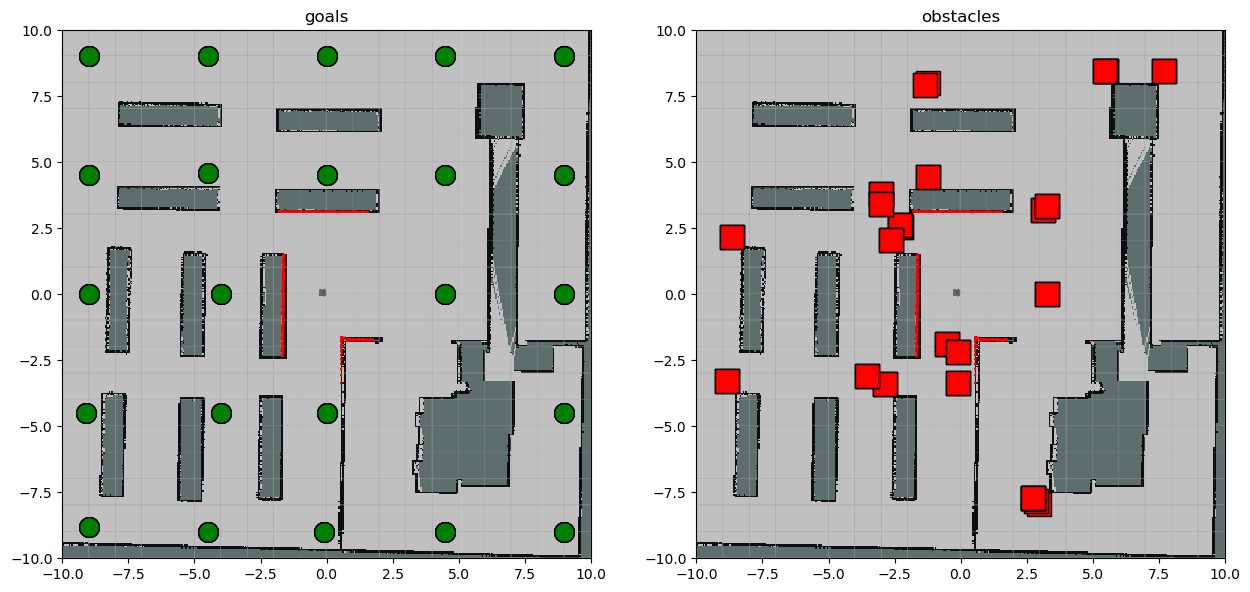

In [314]:
img = plt.imread('warehouse_cropped.png')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax[0].imshow(img, extent=[-10, 10, -10, 10])
ax[0].scatter(data['goal_x'], data['goal_y'], c='green', edgecolors='black', s=200)
ax[0].set_title('goals')

ax[1].imshow(img, extent=[-10, 10, -10, 10])
ax[1].scatter(data['obstacle_x'], data['obstacle_y'], c='red', marker='s', edgecolors='black', s=300)
ax[1].set_title('obstacles')
plt.savefig('goals_and_obstacles.png', bbox_inches='tight')
plt.show()

In [315]:
mean_times = pd.DataFrame(data.groupby(['attack', 'goal_x', 'goal_y'])['time'].mean()).reset_index().pivot(index=['goal_x', 'goal_y'], columns='attack', values='time').reset_index()
mean_times['diff'] = mean_times[1] - mean_times[0]
mean_times['diff_pct'] = (mean_times[1] - mean_times[0]) / ((mean_times[1] + mean_times[0]) / 2) * 100
mean_times['distance'] = np.sqrt(np.square(mean_times['goal_x']) + np.square(mean_times['goal_y']))
mean_times

attack,goal_x,goal_y,0,1,diff,diff_pct,distance
0,-9.1,-4.5,42.933333,65.666667,22.733333,41.866176,10.151847
1,-9.0,-8.8,52.666333,57.566333,4.900000,8.890287,12.587295
2,-9.0,0.0,43.100000,58.667000,15.567000,30.593414,9.000000
3,-9.0,4.5,40.866667,64.433333,23.566667,44.761000,10.062306
4,-9.0,9.0,50.800000,79.199667,28.399667,43.691907,12.727922
5,-4.5,-9.0,39.566667,64.400000,24.833333,47.771722,10.062306
6,-4.5,4.6,26.466667,62.433000,35.966333,80.914439,6.435060
7,-4.5,9.0,38.267000,65.900333,27.633333,53.055660,10.062306
8,-4.0,-4.5,24.133333,50.533667,26.400333,70.714863,6.020797
9,-4.0,0.0,23.733667,35.833667,12.100000,40.626294,4.000000


In [351]:
print(mean_times['diff'].mean())
print(mean_times['diff_pct'].mean())

17.7883768115942
36.0024350029562


/home/adrian/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib/python3/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


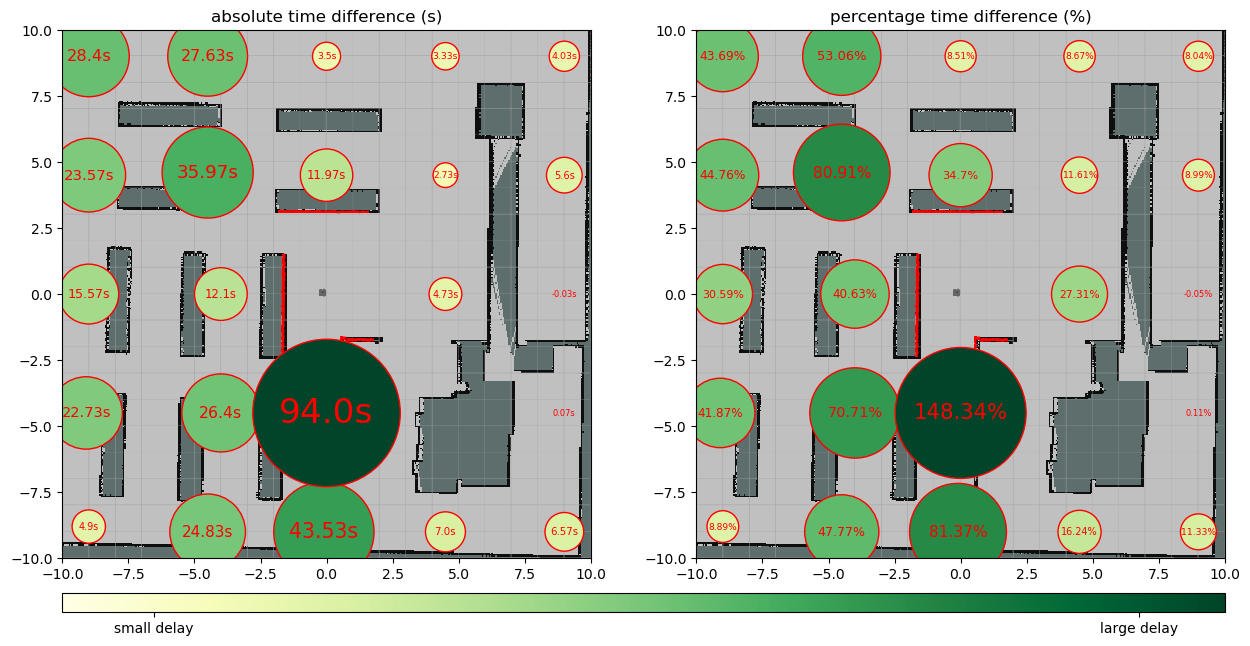

In [328]:
img = plt.imread('warehouse_cropped.png')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

time_col='diff'
ax[0].imshow(img, extent=[-10, 10, -10, 10])
im = ax[0].scatter(mean_times['goal_x'], mean_times['goal_y'], c=np.sqrt(mean_times[time_col]), cmap='YlGn', edgecolors='red', s=(mean_times[time_col]-0.1)*120)
for index, row in mean_times.iterrows():
    ax[0].text(row['goal_x'], row['goal_y'], f"{round(row[time_col], 2)}s", fontsize=row[time_col]/5 + 6, color='red', horizontalalignment='center', verticalalignment='center')
ax[0].set_title('absolute time difference (s)')
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)

time_col='diff_pct'
ax[1].imshow(img, extent=[-10, 10, -10, 10])
ax[1].scatter(mean_times['goal_x'], mean_times['goal_y'], c=np.sqrt(mean_times[time_col]), cmap='YlGn', edgecolors='red', s=(mean_times[time_col]-0.2)*60)
for index, row in mean_times.iterrows():
    ax[1].text(row['goal_x'], row['goal_y'], f"{round(row[time_col], 2)}%", fontsize=row[time_col]/16 + 6, color='red', horizontalalignment='center', verticalalignment='center')
ax[1].set_title('percentage time difference (%)')
ax[1].set_xlim(-10, 10)
ax[1].set_ylim(-10, 10)

cbar = fig.colorbar(im, ax=ax.ravel().tolist(), location='bottom', aspect=60, pad=0.03)
cbar.set_ticks([1, 9])
cbar.set_ticklabels(['small delay', 'large delay'])

plt.savefig('time_delays.png', bbox_inches='tight')
plt.show()

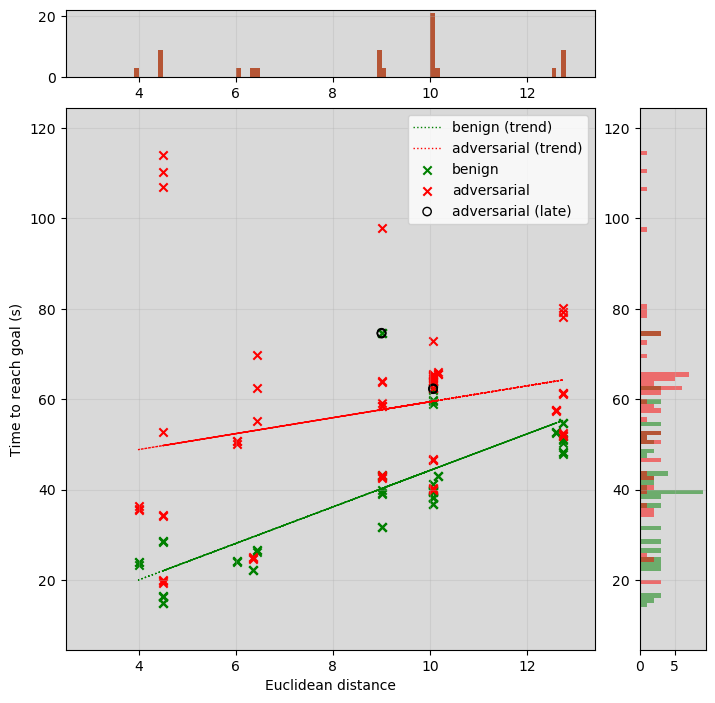

In [344]:
def scatter_hist(data, ax, ax_histx, ax_histy):
    colours = {0: 'green', 1: 'red'}
    labels = {0: 'benign', 1: 'adversarial'}
    for i in [0, 1]:
        d = data[data['attack']==i]
        x = d['distance'].values
        y = d['time'].values
        if i == 1:
            dd = d[d['obstacle_on_time']==1]
            dx = dd['distance'].values
            dy = dd['time'].values
            ax.scatter(dx, dy, label=labels[i], color=colours[i], marker='x')

            dd = d[d['obstacle_on_time']==0]
            dx = dd['distance'].values
            dy = dd['time'].values
            ax.scatter(dx, dy, label=f'{labels[i]} (late)', color='black', facecolors='none')
        else:
            ax.scatter(x, y, label=labels[i], color=colours[i], marker='x')

        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), label=f'{labels[i]} (trend)', color=colours[i], linewidth=1, linestyle="dotted")

        ax_histx.hist(x, bins=np.arange(3, 13, 0.1), color=colours[i], alpha=0.5)
        ax_histy.hist(y, bins=np.arange(10, 120, 1), orientation='horizontal', color=colours[i], alpha=0.5)

    ax.legend()

fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 1), height_ratios=(1, 8),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.1)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(data, ax, ax_histx, ax_histy)

ax.set_xlabel('Euclidean distance')
ax.set_ylabel('Time to reach goal (s)')

ax.grid(True, zorder=-1, alpha=0.3)
ax.set_facecolor('0.85')

ax_histx.grid(True, zorder=-1, alpha=0.3)
ax_histx.set_facecolor('0.85')

ax_histy.grid(True, zorder=-1, alpha=0.3)
ax_histy.set_facecolor('0.85')

plt.savefig('scatter_data.png', bbox_inches='tight')
plt.show()

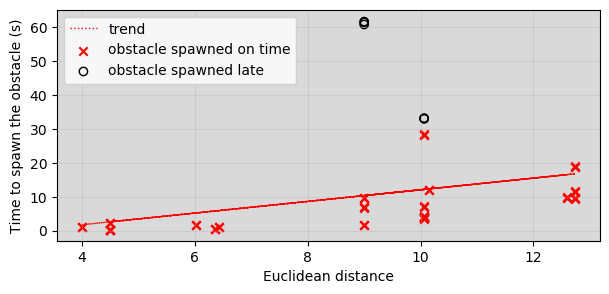

In [350]:

fig, ax = plt.subplots(figsize=(7, 3))

d = data[data['attack']==1]
x = d['distance'].values
y = d['obstacle_time'].values

dd = d[d['obstacle_on_time']==1]
dx = dd['distance'].values
dy = dd['obstacle_time'].values
ax.scatter(dx, dy, label='obstacle spawned on time', color='red', marker='x')

dd = d[d['obstacle_on_time']==0]
dx = dd['distance'].values
dy = dd['obstacle_time'].values
ax.scatter(dx, dy, label='obstacle spawned late', color='black', facecolors='none')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), label='trend', color='red', linewidth=1, linestyle="dotted")

ax.legend()
ax.set_xlabel('Euclidean distance')
ax.set_ylabel('Time to spawn the obstacle (s)')

ax.grid(True, zorder=-1, alpha=0.3)
ax.set_facecolor('0.85')

ax_histx.grid(True, zorder=-1, alpha=0.3)
ax_histx.set_facecolor('0.85')

ax_histy.grid(True, zorder=-1, alpha=0.3)
ax_histy.set_facecolor('0.85')

plt.savefig('scatter_data_spawn_time.png', bbox_inches='tight')
plt.show()